Medical Cost Personal Insurance Datasets
Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

Downlaod Files:
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [494]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [495]:
Med=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
Med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [496]:
Med.shape

(1338, 7)

In [497]:
Med.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [498]:
Med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [499]:
Med.columns = Med.columns.str.replace(' ', '_')
Med.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [500]:
Med.isnull().sum()     #no Missing Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [501]:
Med.duplicated().sum()

1

In [502]:
#dropping duplicate rows and resetting index
Med=Med.drop_duplicates()
print('Number of rows after removing duplicates=', len(Med))

Number of rows after removing duplicates= 1337


<AxesSubplot:>

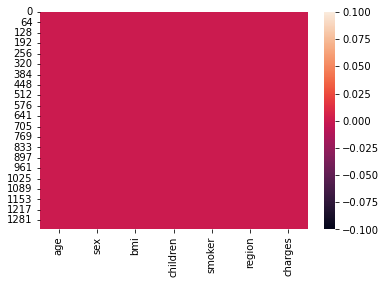

In [503]:
sns.heatmap(Med.isnull())

In [504]:
Med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Univariate Analysis 'charges' variable

In [505]:
#Frequency of 'charges'
Med['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

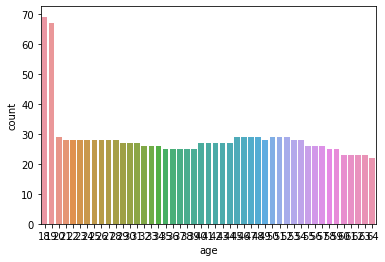

In [506]:
sns.countplot(data=Med,x='age')

# EDA

In [507]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Med.columns:
    if Med[i].dtypes=='object':
        Med[i]=enc.fit_transform(Med[i].values.reshape(-1,1))
Med.tail(20)

,age,sex,bmi,children,smoker,region,charges
1318,35,1.0,39.710,4,0.0,0.0,19496.71917
1319,39,0.0,26.315,2,0.0,1.0,7201.70085
1320,31,1.0,31.065,3,0.0,1.0,5425.02335
1321,62,1.0,26.695,0,1.0,0.0,28101.33305
1322,62,1.0,38.830,0,0.0,2.0,12981.34570
1323,42,0.0,40.370,2,1.0,2.0,43896.37630
1324,31,1.0,25.935,1,0.0,1.0,4239.89265
1325,61,1.0,33.535,0,0.0,0.0,13143.33665
1326,42,0.0,32.870,0,0.0,0.0,7050.02130
1327,51,1.0,30.030,1,0.0,2.0,9377.90470


In [508]:
Med.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

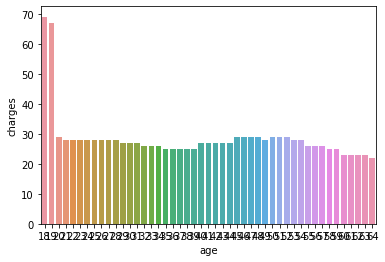

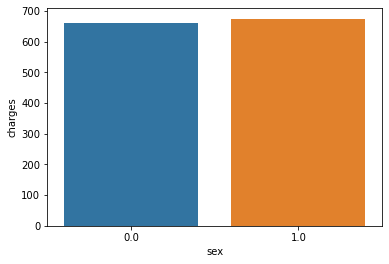

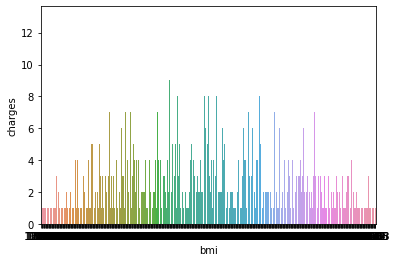

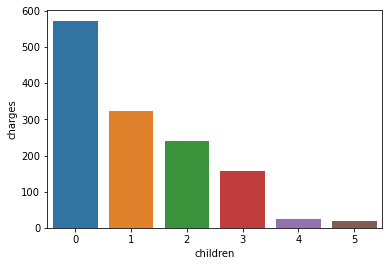

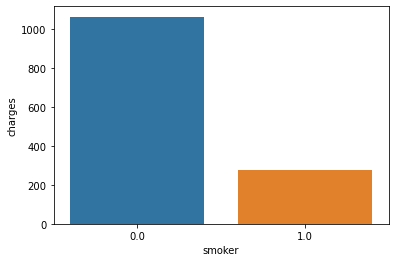

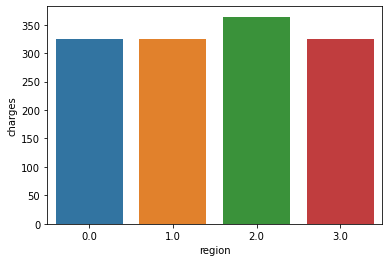

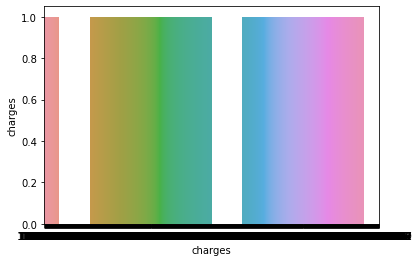

In [509]:
for column in Med.columns:
    sns.countplot(x=column, data=Med)
    plt.xlabel(column)
    plt.ylabel('charges')
    plt.show()

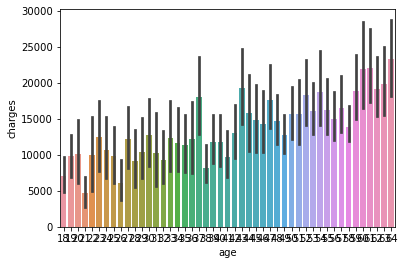

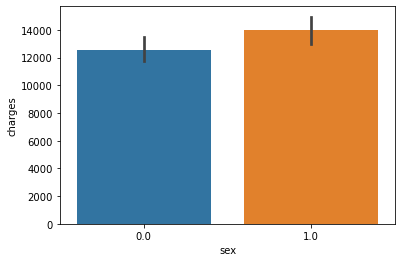

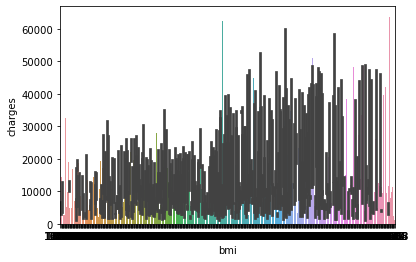

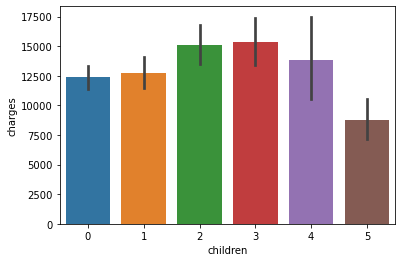

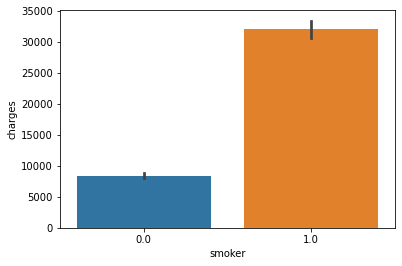

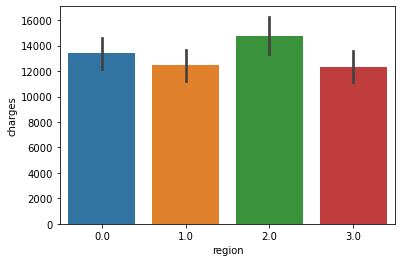

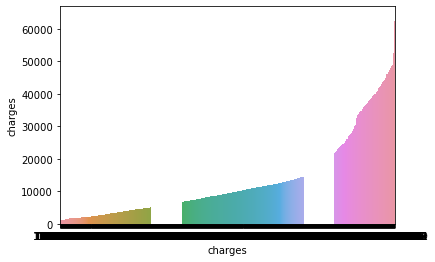

In [510]:
for column in Med.columns:
    sns.barplot(x=column,y='charges',data=Med)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

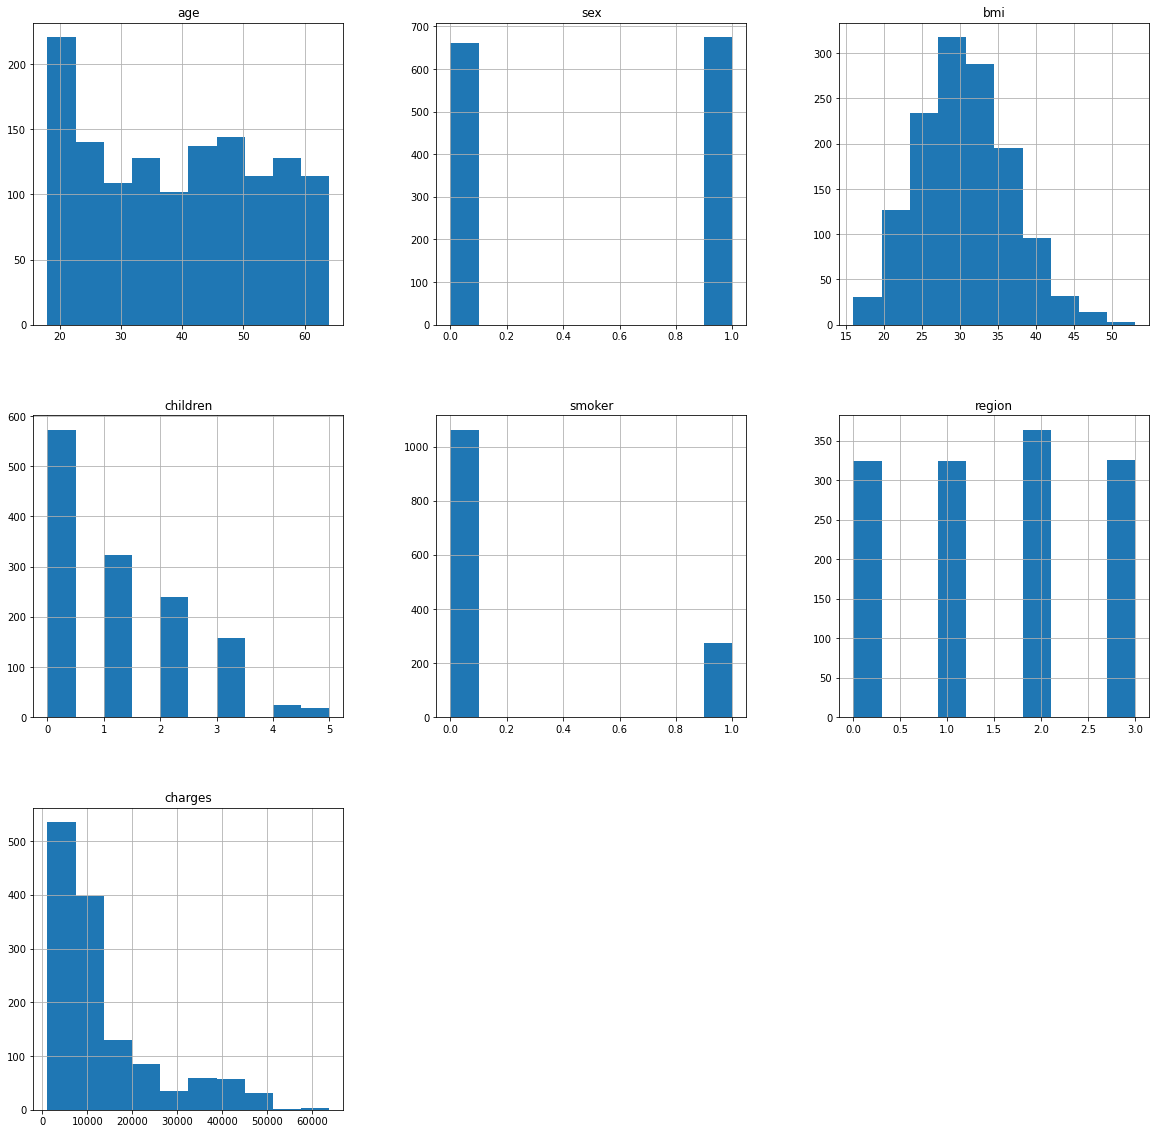

In [511]:
Med.hist(bins=10, figsize=(20,20))

# Multivarate 

<AxesSubplot:xlabel='age', ylabel='charges'>

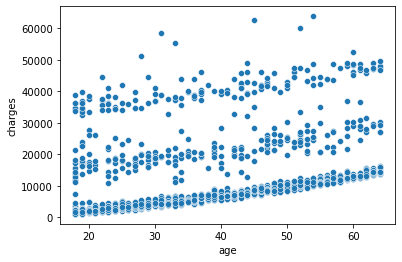

In [512]:
sns.scatterplot(x='age',y='charges',data=Med)

<AxesSubplot:xlabel='sex', ylabel='charges'>

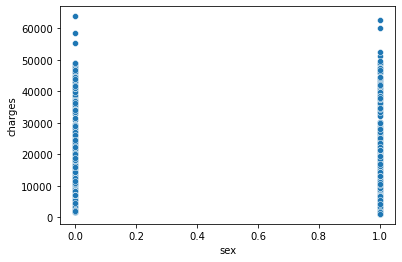

In [513]:
sns.scatterplot(x='sex',y='charges',data=Med)

<Figure size 1800x2160 with 0 Axes>

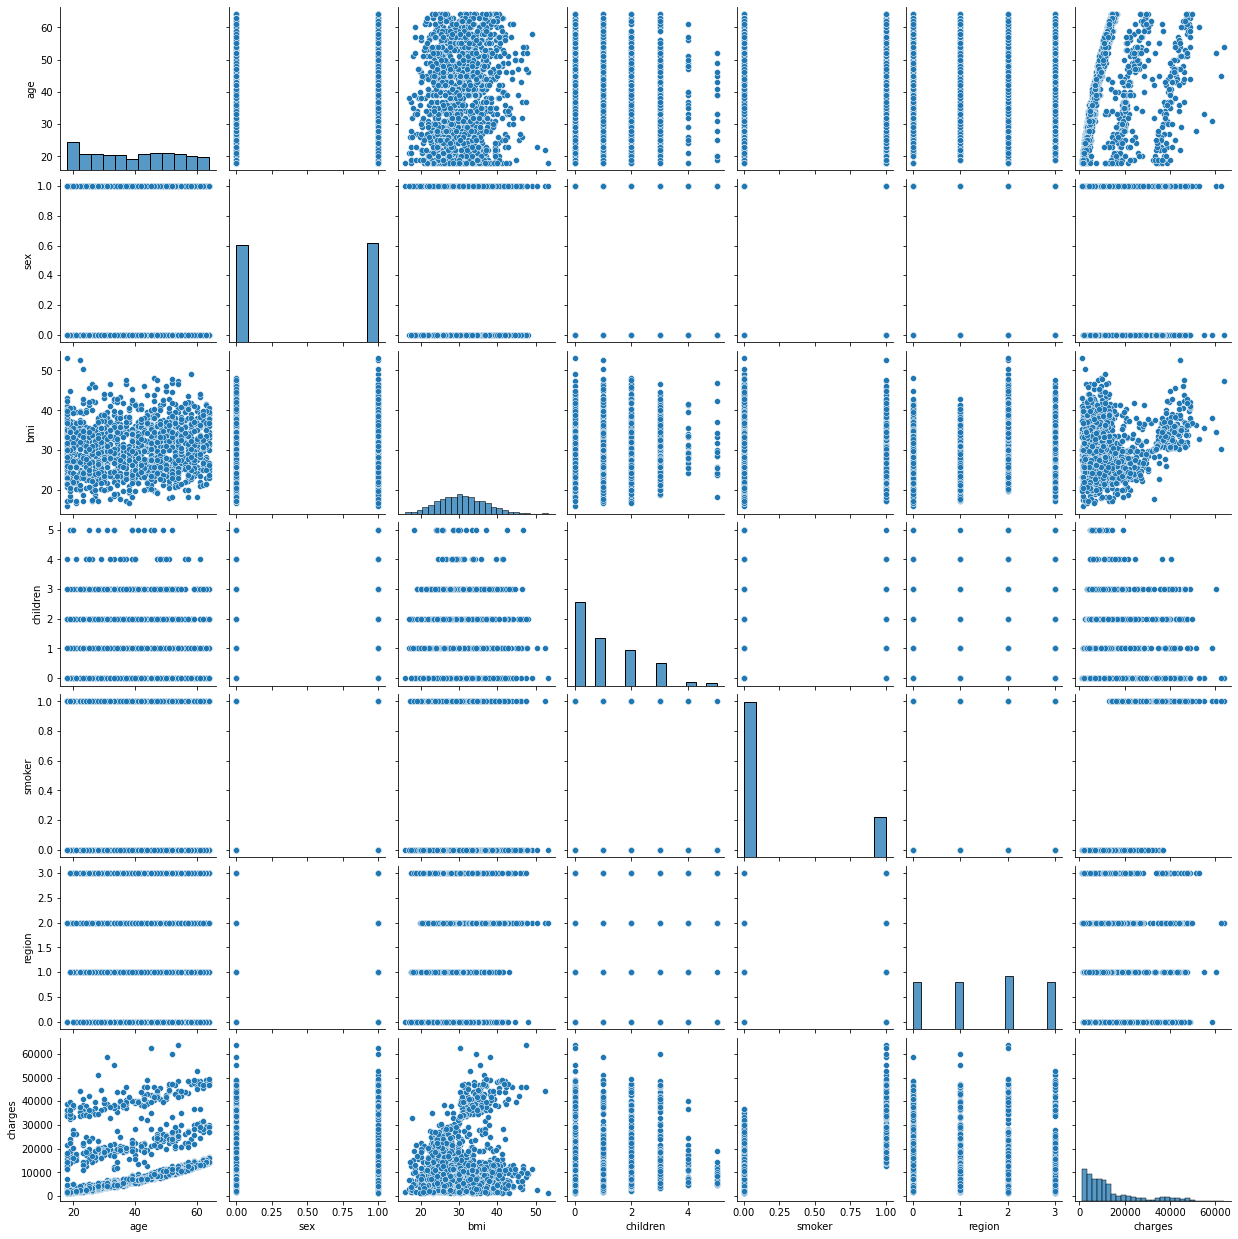

In [514]:
plt.figure(figsize=(25,30))
sns.pairplot(Med)
plt.show()

Now Lets See that counts of each columns

In [515]:
for i in Med.columns:
        print(Med[i].value_counts())
        print('*'*100)

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
****************************************************************************************************
1.0    675
0.0    662
Name: sex, dtype: int64
****************************************************************************************************
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64
****************************************************************************************************
0    573
1    324
2    240
3    157

<AxesSubplot:>

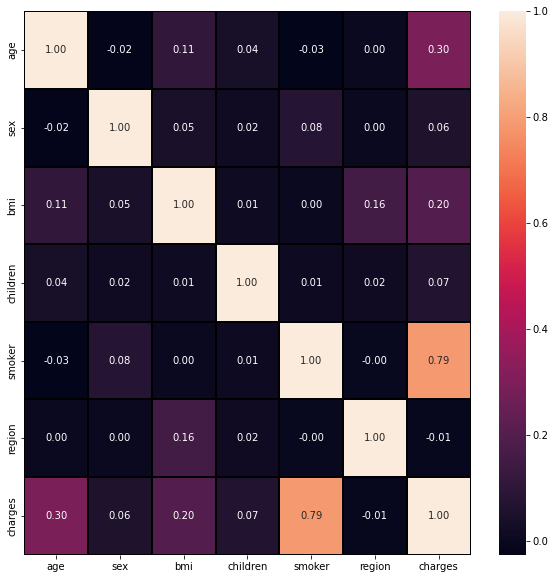

In [516]:
plt.figure(figsize = (10,10))
sns.heatmap(Med.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

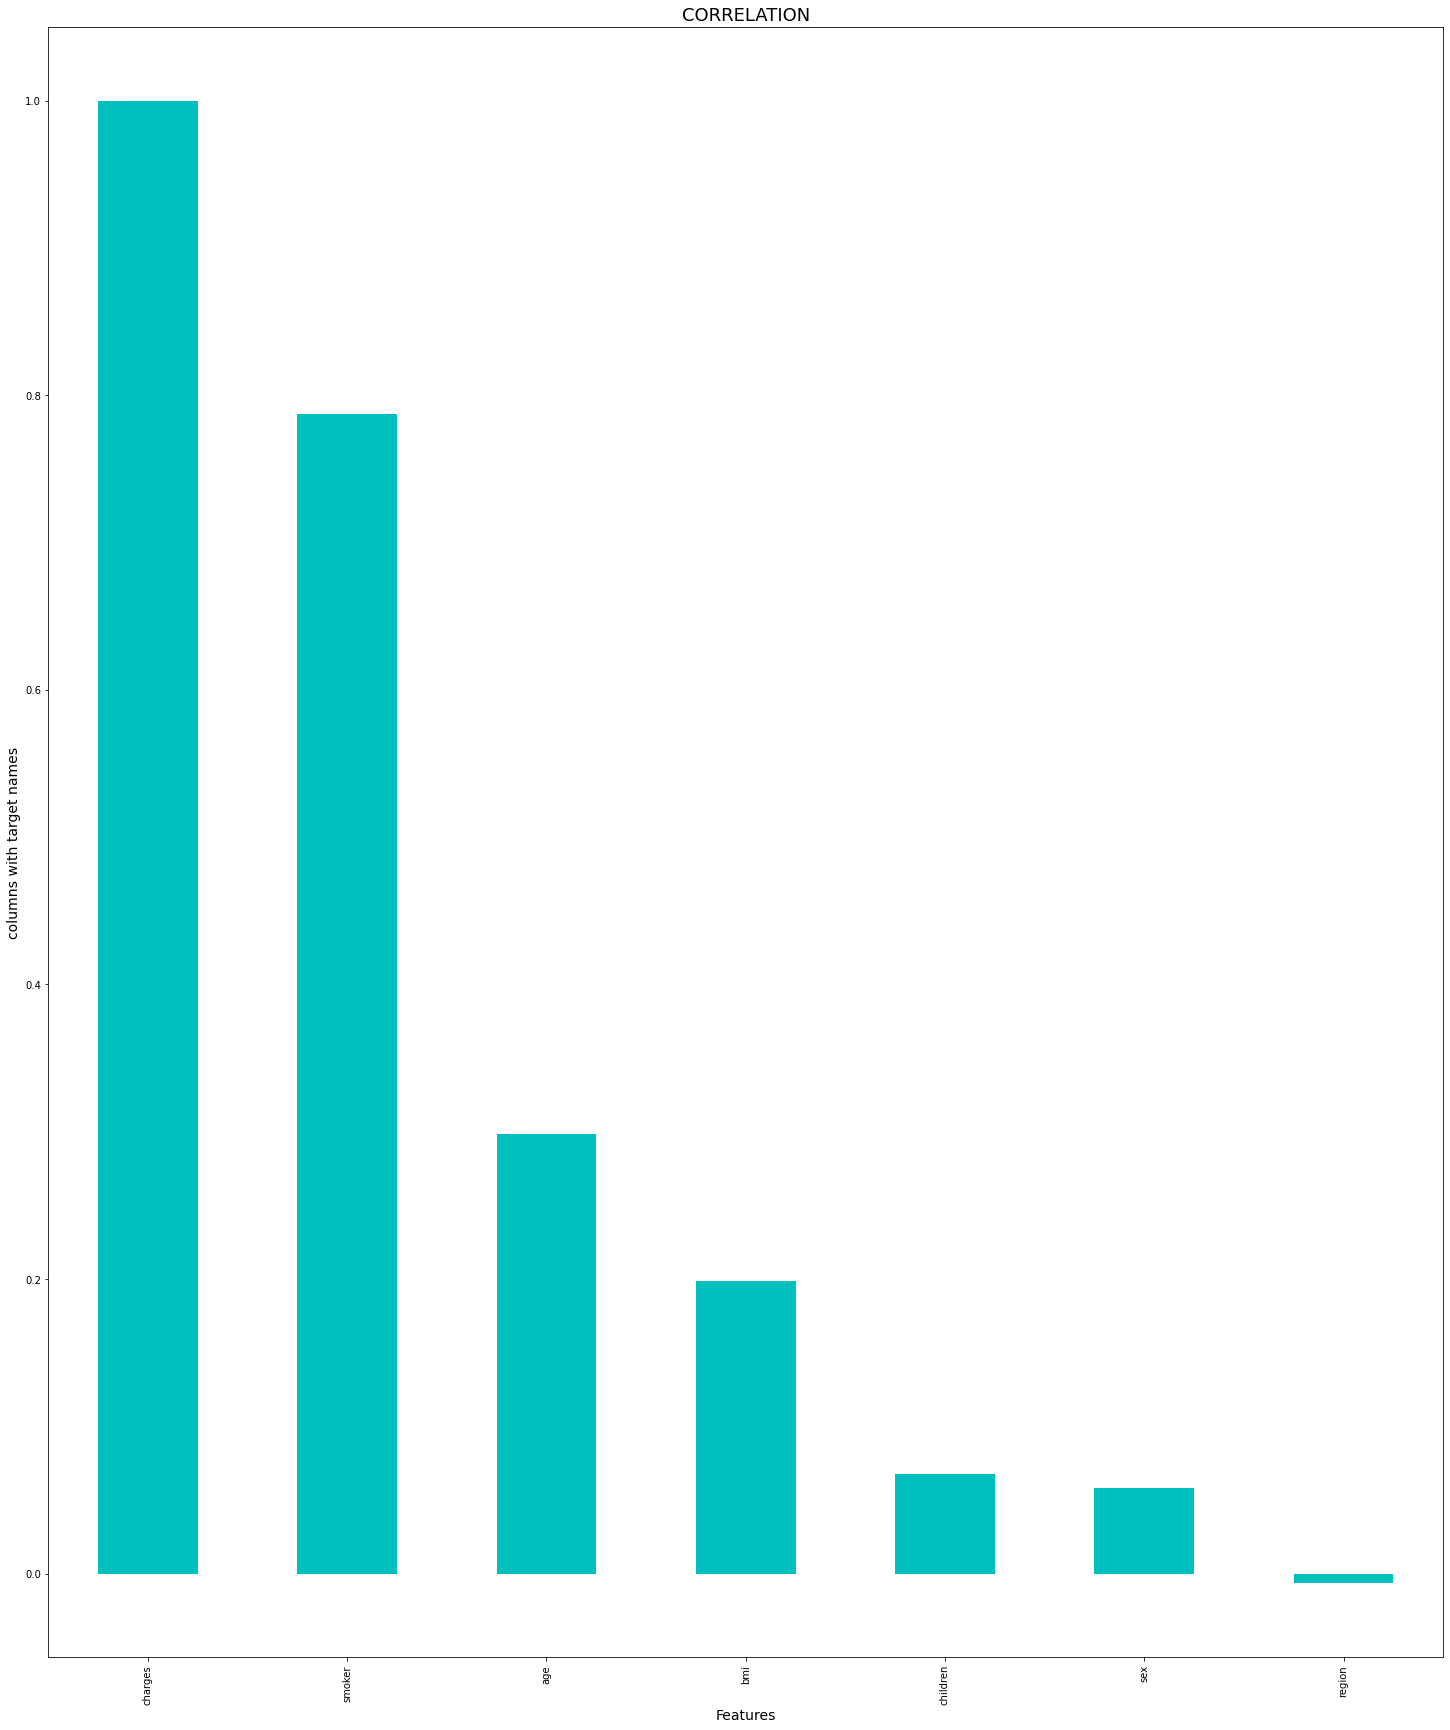

In [517]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Med.corr()['charges'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [518]:
Med.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [519]:
Med.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

# DESCRIPTIVE STATSTICS

In [520]:
Med.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region,1337.0,1.516081,1.105208,0.0000,1.000,2.0000,2.00000,3.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<AxesSubplot:>

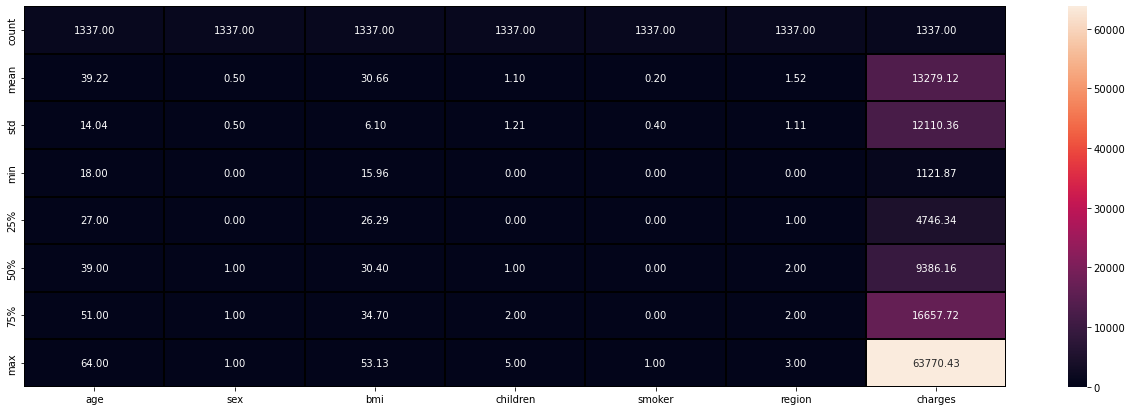

In [521]:
plt.figure(figsize = (22,7))
sns.heatmap(Med.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [522]:
Med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   charges   1337 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 115.9 KB


OUTLIERS CHECKING(Any One outlier method can be  used)

In [523]:
colmlist=Med.columns.values
ncol=30
nrows=14

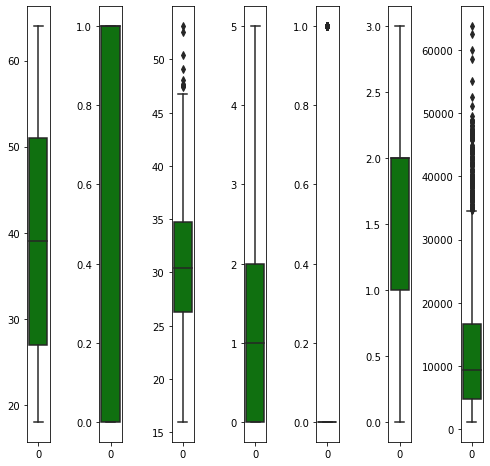

In [524]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Med[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

age            AxesSubplot(0.125,0.125;0.0945122x0.755)
sex         AxesSubplot(0.238415,0.125;0.0945122x0.755)
bmi         AxesSubplot(0.351829,0.125;0.0945122x0.755)
children    AxesSubplot(0.465244,0.125;0.0945122x0.755)
smoker      AxesSubplot(0.578659,0.125;0.0945122x0.755)
region      AxesSubplot(0.692073,0.125;0.0945122x0.755)
charges     AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

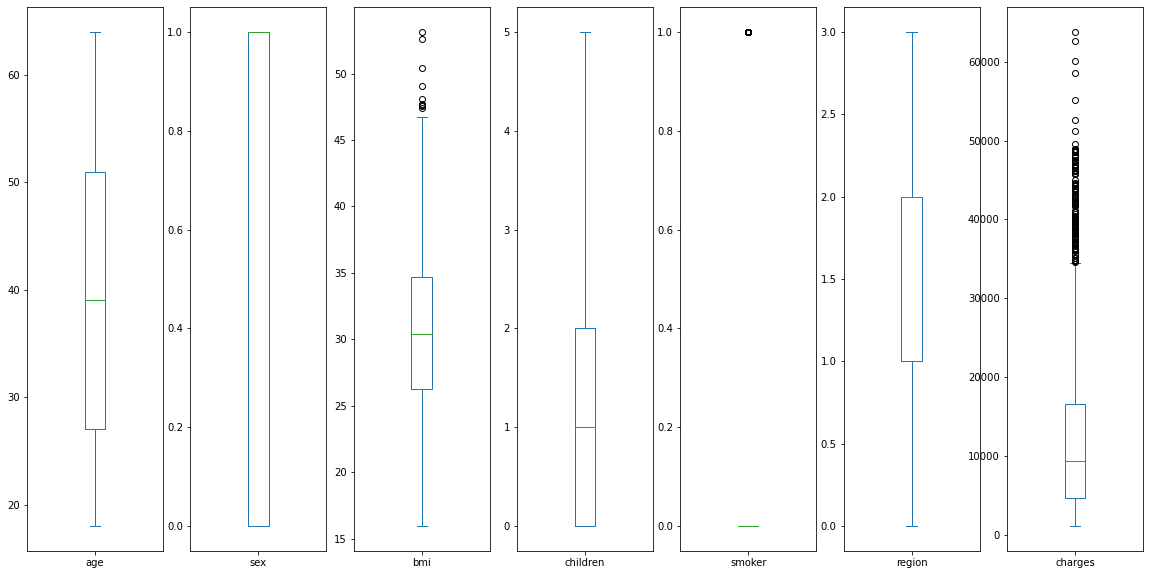

In [525]:
# to find out outliers in the dataset
Med.plot(kind='box',subplots=True,figsize=(20,10))

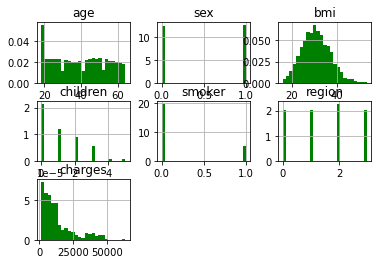

In [526]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Med.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data
fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

<AxesSubplot:xlabel='age', ylabel='Density'>

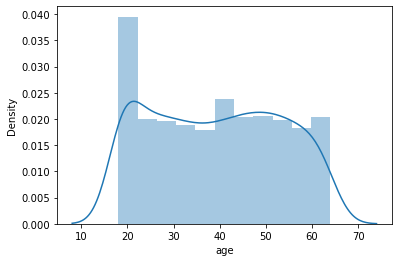

In [527]:
sns.distplot(Med['age'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

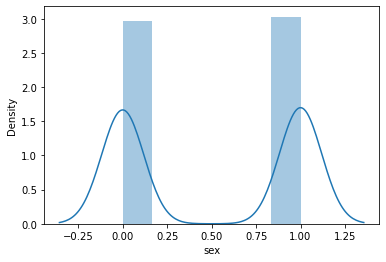

In [528]:
 sns.distplot(Med['sex'])
    

<AxesSubplot:xlabel='bmi', ylabel='Density'>

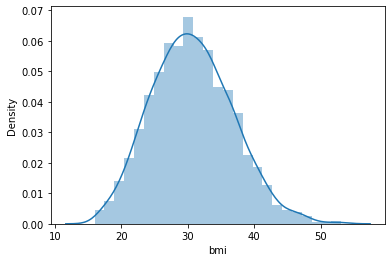

In [529]:
sns.distplot(Med['bmi'])
    

<AxesSubplot:xlabel='children', ylabel='Density'>

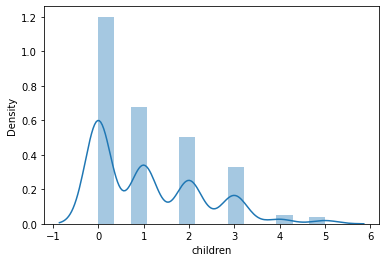

In [530]:
sns.distplot(Med['children'])

<AxesSubplot:xlabel='smoker', ylabel='Density'>

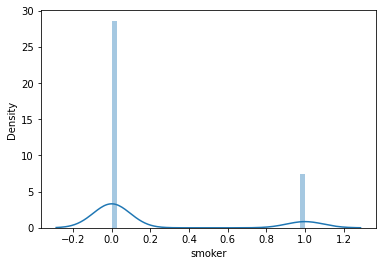

In [531]:
sns.distplot(Med['smoker'])

<AxesSubplot:xlabel='region', ylabel='Density'>

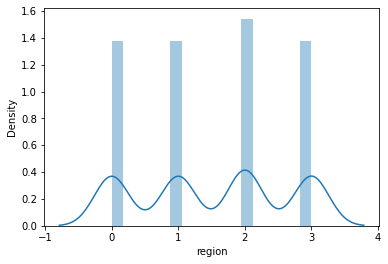

In [532]:
sns.distplot(Med['region'])

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [533]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Med)) < 3).all()

age          True
sex          True
bmi         False
children    False
smoker       True
region       True
charges     False
dtype: bool

In [534]:
#to remove outliers in data set through zscore
z = np.abs(zscore(Med))
z.shape

(1337, 7)

In [535]:
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [536]:
Med_new=Med[(z<3).all(axis=1)]
print(Med.shape)
print(Med.shape)

(1337, 7)
(1337, 7)


In [537]:
Med.shape

(1337, 7)

In [538]:
Med_new.shape

(1308, 7)

In [539]:
print ("Old DataFrame =",Med.shape)
print ("New DataFrame =",Med_new.shape)
print ("Total dropped rows = ",Med.shape[0] - Med_new.shape[0])

Old DataFrame = (1337, 7)
New DataFrame = (1308, 7)
Total dropped rows =  29


In [540]:
#to find % loss in data
loss = (1337-1308)/1337 * 100
print(loss)

2.169035153328347


In [541]:
Med_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [542]:
# Independent column

x=Med_new.iloc[:,0:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [543]:
x.shape

(1308, 6)

In [544]:
# Target or dependent variable

y=Med_new.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1308, dtype: float64

In [545]:
y.shape

(1308,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [546]:
Med

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [547]:
Med.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

In [548]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Med,method='yeo-johnson')

In [549]:
pd.DataFrame(x_new).skew()

0   -0.100367
1   -0.019469
2   -0.006675
3    0.104612
4    1.463601
5   -0.172852
6   -0.008649
dtype: float64

In [550]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440754,-1.004598,-0.449186,-0.930279,1.983897,1.351994
1,-1.511806,0.995423,0.533188,-0.040802,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.738153,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-0.930279,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-0.930279,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.738153,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-0.930279,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-0.930279,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-0.930279,-0.504058,1.351994


In [551]:
x.mean()

age         1.538015e-16
sex         6.620596e-17
bmi         6.308664e-16
children    2.130474e-16
smoker     -1.483693e-16
region     -5.279501e-17
dtype: float64

In [552]:
x.std()

age         1.000382
sex         1.000382
bmi         1.000382
children    1.000382
smoker      1.000382
region      1.000382
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [553]:
x.shape

(1308, 6)

In [554]:
y.value_counts()

16884.92400    1
8891.13950     1
44202.65360    1
10422.91665    1
7243.81360     1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
29141.36030    1
Name: charges, Length: 1308, dtype: int64

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [555]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [556]:
vif_cal()

   VIF FACTOR  FEATURES
0    1.018995       age
1    1.008847       sex
2    1.043880       bmi
3    1.005068  children
4    1.008065    smoker
5    1.026681    region


# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [557]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [558]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (915, 6)
shape of y_train: (915, 6)
shape of x_test: (393, 6)
shape of y_test: (393,)


In [559]:
x_train

,age,sex,bmi,children,smoker,region
240,1.046058,0.995423,-0.094394,-0.930279,-0.504058,-0.458045
58,0.264489,0.995423,-0.539558,1.738153,-0.504058,-1.363065
166,0.690799,0.995423,-0.047534,-0.930279,-0.504058,1.351994
462,-0.872340,0.995423,0.349097,-0.930279,-0.504058,0.446975
1048,1.046058,-1.004598,0.220234,-0.040802,-0.504058,0.446975
...,...,...,...,...,...,...
580,-1.369702,0.995423,0.091370,0.848676,-0.504058,0.446975
163,-1.440754,-1.004598,0.207682,-0.040802,-0.504058,-0.458045
607,1.117110,-1.004598,1.090480,-0.930279,-0.504058,1.351994
414,1.756576,0.995423,0.551597,-0.930279,1.983897,0.446975


In [560]:
y_test

486     12475.35130
1273     4747.05290
16      10797.33620
113      2404.73380
763      3070.80870
           ...     
1172    11093.62290
474     25382.29700
785      6414.17800
1190     5327.40025
1217     4058.11610
Name: charges, Length: 393, dtype: float64

In [561]:
x_test

,age,sex,bmi,children,smoker,region
478,1.046058,-1.004598,-1.525279,1.738153,-0.504058,-0.458045
1245,-0.303926,0.995423,-0.497719,-0.040802,-0.504058,0.446975
16,0.903955,-1.004598,0.032796,-0.040802,-0.504058,-1.363065
110,-1.298651,-1.004598,0.859530,-0.930279,-0.504058,-0.458045
750,-0.872340,0.995423,-0.762140,-0.930279,-0.504058,-1.363065
...,...,...,...,...,...,...
1147,1.188162,-1.004598,1.895458,-0.930279,-0.504058,0.446975
466,1.046058,0.995423,-0.917781,1.738153,1.983897,1.351994
772,-0.303926,-1.004598,-0.482657,1.738153,-0.504058,1.351994
1165,-0.588133,-1.004598,0.366669,0.848676,-0.504058,-0.458045


In [562]:
y_train

245     24476.47851
60       8606.21740
171      8116.68000
470      2497.03830
1069    10928.84900
           ...     
592      2566.47070
168      2719.27975
619     10713.64400
420     46889.26120
991      7144.86265
Name: charges, Length: 915, dtype: float64

CROSS VALIDATION FOR LinearRegression ,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [563]:
models=[SVR(),ExtraTreesRegressor(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]


In [564]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

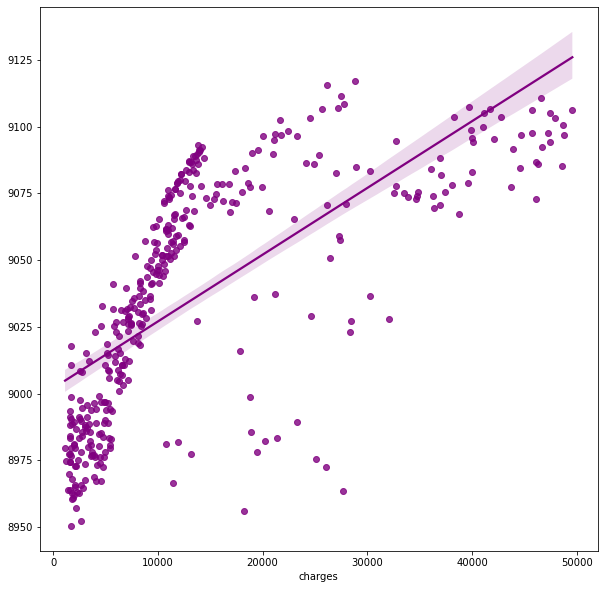

SVR()
Mean absolute error 8722.050076307338
Mean squared error 174037334.2986171
Root Mean squared error 13192.321035307514
R2 Score -0.14682822683927776
---------------------------------------------------------------------------------------------------------


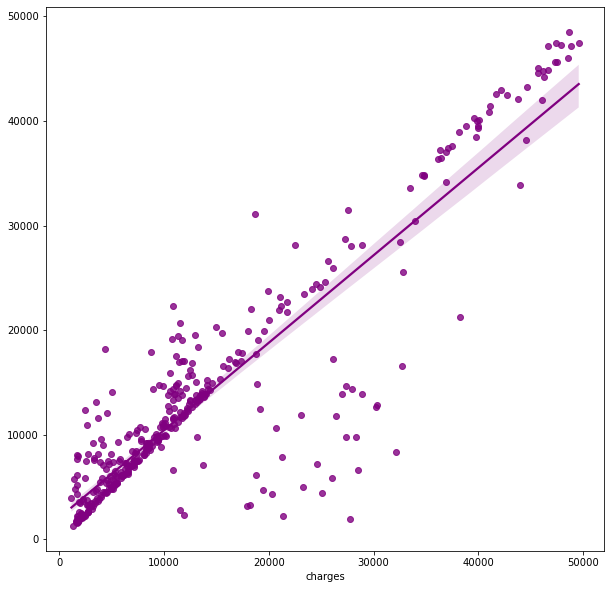

ExtraTreesRegressor()
Mean absolute error 2730.5656991790843
Mean squared error 28023783.571957473
Root Mean squared error 5293.749481412723
R2 Score 0.8153357947438348
---------------------------------------------------------------------------------------------------------


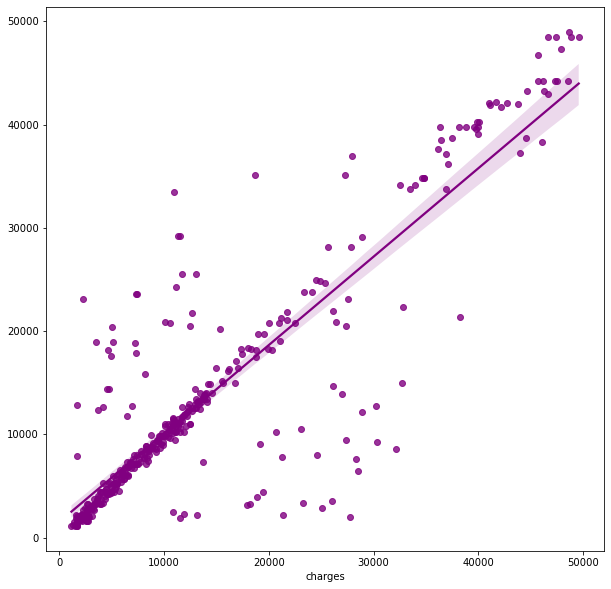

DecisionTreeRegressor()
Mean absolute error 2780.605035890586
Mean squared error 36020101.246856384
Root Mean squared error 6001.674870138867
R2 Score 0.7626436361486387
---------------------------------------------------------------------------------------------------------


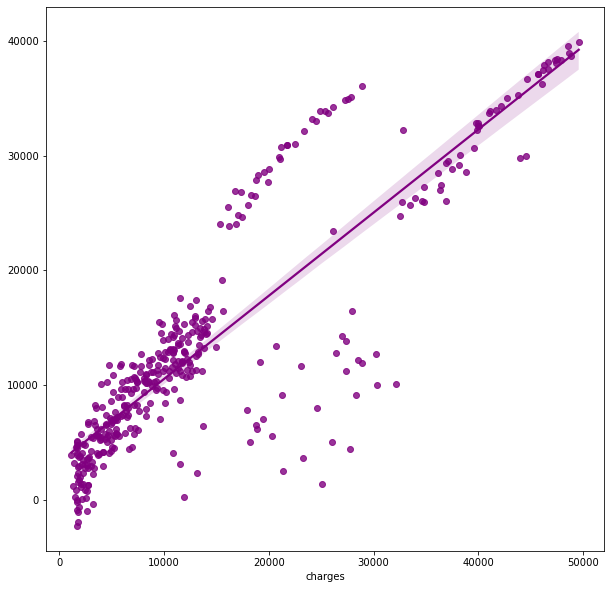

LinearRegression()
Mean absolute error 4354.633488792735
Mean squared error 38385001.53027107
Root Mean squared error 6195.563051916352
R2 Score 0.7470600005476324
---------------------------------------------------------------------------------------------------------


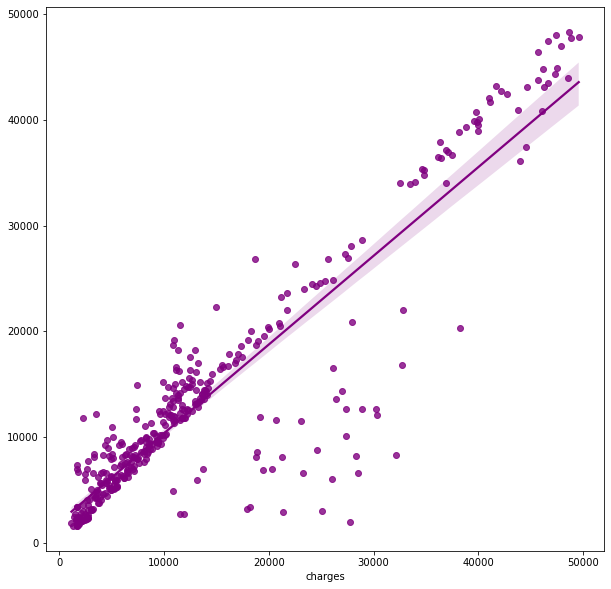

RandomForestRegressor()
Mean absolute error 2677.2767732433927
Mean squared error 25883240.838605832
Root Mean squared error 5087.557453101226
R2 Score 0.8294410143925758
---------------------------------------------------------------------------------------------------------


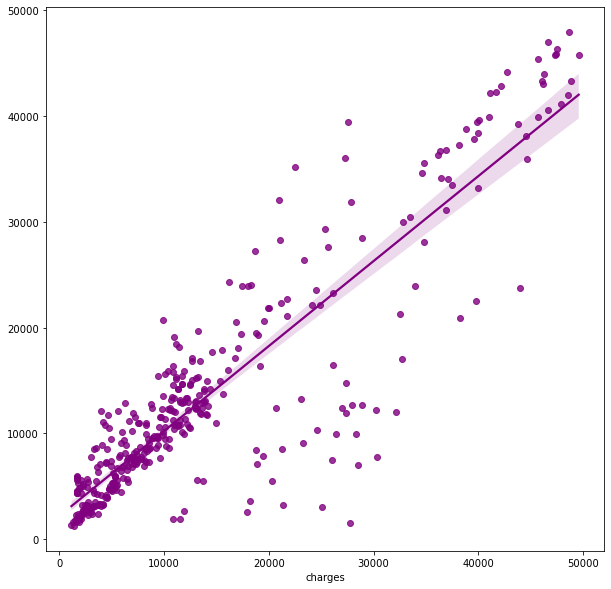

KNeighborsRegressor()
Mean absolute error 3258.5382707272265
Mean squared error 31099249.921009686
Root Mean squared error 5576.670146333714
R2 Score 0.7950698464402619
---------------------------------------------------------------------------------------------------------


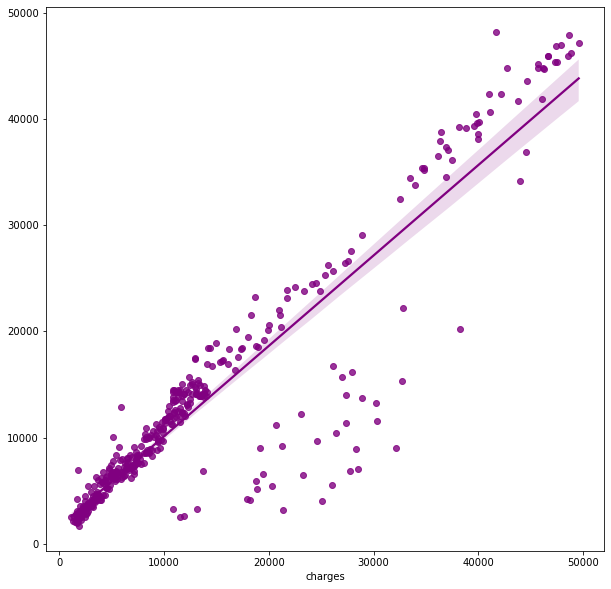

GradientBoostingRegressor()
Mean absolute error 2514.5772819238005
Mean squared error 23458121.128621258
Root Mean squared error 4843.358455516302
R2 Score 0.8454214690926147
---------------------------------------------------------------------------------------------------------


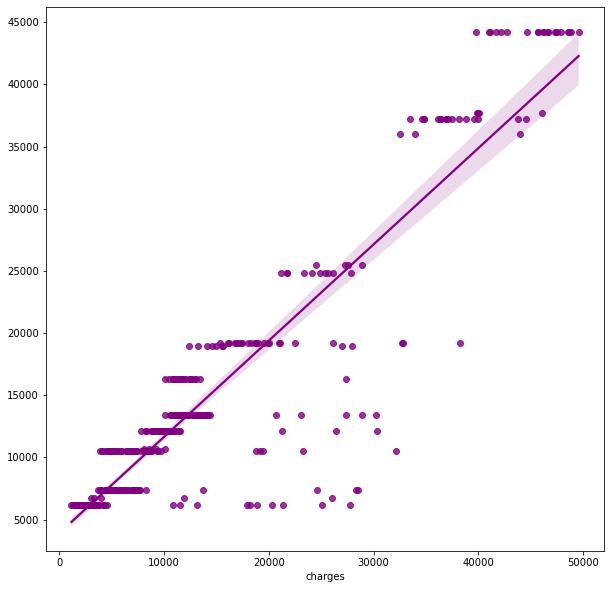

AdaBoostRegressor()
Mean absolute error 3731.5992310025385
Mean squared error 27001167.852036737
Root Mean squared error 5196.264798106111
R2 Score 0.8220743751613124
---------------------------------------------------------------------------------------------------------


In [565]:
for i in models:
    create_model(i)

In [566]:
from sklearn.model_selection import GridSearchCV

In [567]:
#Param={'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [568]:
Param={}

In [569]:
GSCV=GridSearchCV(GradientBoostingRegressor(),Param,cv=5)

In [570]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), param_grid={})

In [571]:
last_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1,)
CLassifer=last_model.fit(x_train,y_train)
lr_pred=last_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 74.70600005476325


In [572]:
last_model

LinearRegression(n_jobs=1)

In [573]:
# Linear Regression

lg_param = {'copy_X' : [True,False],'fit_intercept' : [True,False],'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

In [574]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(LinearRegression(),lg_param, cv=5)

In [575]:
RSCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'positive': [True, False]})

In [576]:
RSCV.best_params_

{'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': False}

In [577]:
Final_Model = LinearRegression(positive=True,n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 74.45145841124159


In [578]:
Final_Model

LinearRegression(n_jobs=10, positive=True)

In [579]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [580]:
lasso= Lasso(alpha=0.0001)

In [581]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [582]:
lasso.score(x_train,y_train)

0.7543283246883429

In [583]:
lasso_pred=lasso.predict(x_test)

In [584]:
r2_score(y_test,lasso_pred)

0.7457733157807048

In [585]:
ridge=Ridge(alpha=0.1)

In [586]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [587]:
ridge.score(x_train,y_train)

0.7543283152108086

In [588]:
ridge_pred=ridge.predict(x_test)

In [589]:
r2_score(y_test,ridge_pred)

0.7457672803141118

In [590]:
EN = ElasticNet(alpha=0.001)

In [591]:
EN.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [592]:
enpred=EN.predict(x_test)

In [593]:
r2_score(y_test,enpred)

0.7457455698441813

Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [594]:
# saving the model
import joblib
joblib.dump(Final_Model,'Medical Insurance.pkl')

['Medical Insurance.pkl']

In [595]:
#Loading the saved model
import joblib
MI=joblib.load('Medical Insurance.pkl')

In [596]:
prediction =MI.predict(x_test)
prediction

array([10419.65183902,  6108.18775218, 11556.75301829,  4321.01545951,
        2914.81275821,  4794.64936008,  6967.2487583 ,  6367.04582574,
        4422.95844621,  7444.39015679,  4218.39655822,  6218.22738666,
       14053.1721069 ,  8436.74680587, 10614.65898562,  4617.55098739,
       11849.22005242, 10996.4636745 , 11393.22082407, 39944.8857605 ,
        5930.53034587, 13979.5311859 ,  6517.98548051, 29519.6972733 ,
         136.69960812, 11129.87227399, 16639.63427428, 29200.34247444,
       12591.80170725,  4174.59382848,  3619.31169289, 11677.15102   ,
       28265.66917497,  9631.84232321, 14729.8076756 ,  7082.7598857 ,
        4132.57032584, 11134.07585635, 11074.43981355, 11506.76795647,
       13087.56075658, 13720.2565447 , 12913.95167416, 11139.70111704,
       16305.98574084,  3709.21379639, 10188.63892381, 10890.90713918,
       37471.98398954, 33233.34982049,  1266.12266947,  7100.68145209,
       10010.11345764,  2945.47129225, 12181.5893735 ,  4286.43285992,
      

In [597]:
pd.DataFrame([MI.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Predicted,10419.651839,6108.187752,11556.753018,4321.01546,2914.812758,4794.64936,6967.248758,6367.045826,4422.958446,7444.390157,...,25525.640707,27410.676663,9762.037696,15080.242991,2903.89732,15435.013525,34263.363754,7340.242507,7248.950197,8113.477281
Original,12475.351300,4747.052900,10797.336200,2404.73380,3070.808700,1633.96180,4402.233000,3366.669700,4931.647000,8269.044000,...,36898.733080,36397.576000,8310.839150,11856.411500,2639.04290,11093.622900,25382.297000,6414.178000,5327.400250,4058.116100


In [598]:
import pickle
filename = 'Happiness Final.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))

In [599]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)*100
print(result)

74.45145841124159
